In [2]:
'''Karan Kumar 14906619'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma


In [4]:
#constants from assignment 3 solutions changed for this assignment

M = 4.2E6            # Mass of Sgr A* in M_sun
M_sun = 1.988e33     # Solar mass in g
Ledd = 1.26e38 * M   # Eddington luminosity in erg/s
lightspeed = 2.997e10         # Speed of light in vaccum in cm/s
G = 6.67e-8          # Gravitational constant in erg cm/g^2
rg = G*M*M_sun/lightspeed**2# Gravitational radius in cm
me = 9.1e-28         # Electron mass in g
q = 4.8e-10          # Electron charge in esu
eta = 1e-7           # radiative efficiency
R0 = 10*rg           # beginning radius of the blob in cm
gam = 1000           # we know this from measurements
p = 2                # power law index
nuSSA = 1e12            # frequency in Hz self synchrotron
omega = 2*np.pi*nuSSA # angular frequency
pitch = 10*np.pi/180     # pitch angle in radians
D = 26670*9.461e+17  # Distance to Sgr A* in cm





In [20]:
def absorption(freq,C,mag):
    '''Evaluate the absorption coefficent for various p indicies 
    include angular dependence
    input: 
    freq- frequnecy
    C: see function C_consant
    mag: magnetic field strength see function mag_density
    variables:
    gammas- evaluate a specific gamma function for different p values
    absorb- the absorption coeifficent
    
    return
    absorb'''
    gamA = gamma((3*p+2)/12)
    gamB = gamma((3*p+22)/12)
    angle = np.sin(pitch)**(p+2/2)
    abs_const = gamA*gamB*(3*np.sqrt(3)*q**4)*angle/(16*(np.pi**2)*(me**3)*(lightspeed**5))

    absorb = abs_const*C*(mag**2)*(freq**(-3))
    
    return absorb

In [11]:
time_arr = np.logspace(-1,5, 1000) # sec
freq_arr = np.logspace(8,14,1000) #hz
distance = np.logspace(0,22,1000) # cm distance to sgrA
def radius(dz,v,t):
    R = (R0 + distance *np.tan(pitch/2)) #+ v*t
    return R

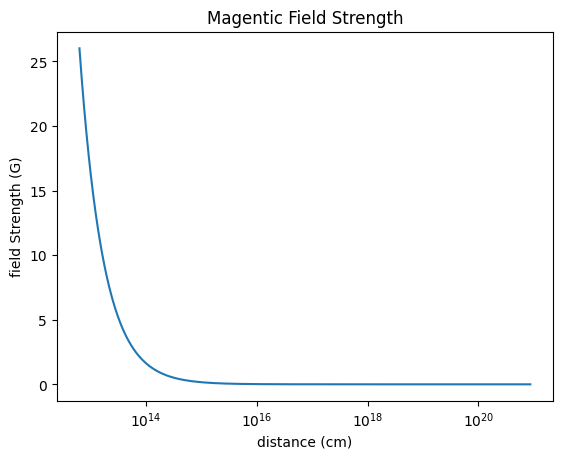

In [30]:
radiusSGRA = radius(rg, 0.3*lightspeed,time_arr) # from 10 rg to 1000rg
mag_flux = 2.00*(10**26) #gauss * cm^2 magnetic flux conserved
def magentic_field(Radius):
    '''Calculate the Magnetic field strength of the jet from equipartition
    Define a conserved flux , and return a 1/r dependent field
    input:
    radius- radius of jet in cm
    
    variables:
    B_r - magnetic field Gauss'''
    dz = rg #height scale in cm
    B_r  = mag_flux/(2*Radius*dz) #gauss
    return B_r
B_r = magentic_field(radiusSGRA)
plt.plot(radiusSGRA, B_r)
plt.xscale('log')
#plt.yscale("log")
plt.title("Magentic Field Strength")
plt.xlabel("distance (cm)")
plt.ylabel("field Strength (G)")
plt.show()

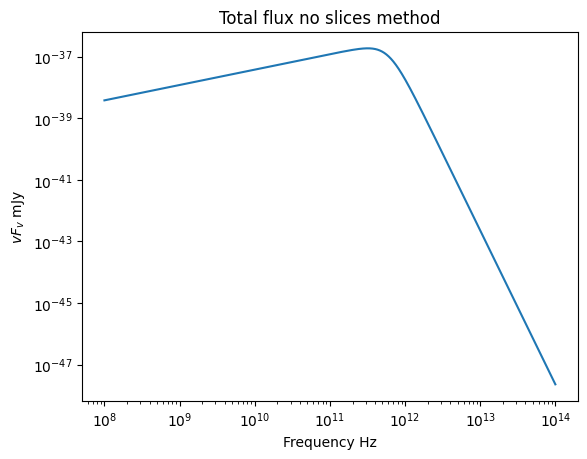

In [35]:
#calculate the C constant
Ub = B_r**2/(8*np.pi)
Ue = Ub
lorentz = 10000
C_hat = Ue/np.log(lorentz)

C = C_hat/(me*lightspeed**2)  # power
B0 = 10**2
P0 = (10**-18.5)*C[0]*((B0**3/2))*(nuSSA**(-1/2))/3
def intensity(freq, mag_field,radius, absorb):
    '''Calculate the intensity of the jet using the emissoin and absorbtion'''
    #pv/4piabs
    num = (10**-18.5)
    den  = (12*np.pi*me*lightspeed**2)
    A = num/den
    Sv = A*(np.sqrt(mag_field)*freq**(5/2))
    tau = absorb*radius
    Iv  = Sv*tau
    return Iv
absorb = absorption(freq_arr,C, B_r)
IvSSA = intensity(freq_arr,B_r, radiusSGRA,  absorb)


#print(IvSSA)
def flux_spec(freq, Iv,radius):
    '''Calculate the flux spectrum normalize around vssa and inital luminosity'''
    dz = rg
    num = (10**-18.5 * np.sqrt(mag_flux))
    den  = (12*np.pi*me*lightspeed**2)*(np.sqrt(2*dz))
    A = num/den
    #normalize flux around inital luminosity
    L0 = 10**41
    Fv = Iv*((radius/D)**2)
    jansky_cov = 10**-20 # convert to mjansky
    Fv = Fv*jansky_cov
    return Fv
Fv = flux_spec(freq_arr, IvSSA,radiusSGRA)

plt.plot(freq_arr, freq_arr*Fv)
plt.title("Total flux no slices method")
plt.xscale('log')
plt.yscale("log")
plt.ylabel("$vF_v$ mJy")
plt.xlabel("Frequency Hz")
plt.show()

In [50]:
# slices method


[2 4 6]
